In [1]:
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense,Activation
#To add fully connected layers

In [2]:
#Initializing the CNN
#there is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,input_shape=(50,50,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines


In [3]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (3,3)))

classifier.add(Convolution2D(64,3, input_shape=(50,50,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (3,3)))

In [4]:
#step -3 Flattening
classifier.add(Flatten())

In [5]:
#step-4 Full connection step
classifier.add(Dense(256, activation = 'softmax'))
classifier.add(Dense(1, activation = 'sigmoid'))
#binary outcome

In [6]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [7]:
### Création d'images à partir de data.csv
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
expr_file = r"../data.csv"
expr = pd.read_csv(expr_file, sep=",")
columns = [ "'Tblood'", "'HR'", "'SpO2'","'Class'"]
expr = expr[columns]
print(expr.columns)
y = expr["'Class'"]
print(y)
y = y.loc[1:].astype(int)
# On enleve la date et la classe 
X = expr.iloc[1:, :-1].values.astype(float)
print(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24, stratify=y)
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=1701, 
                      n_jobs=-1)
X_train_img = it.fit_transform(X_train_norm)

X_test_img = it.transform(X_test_norm)

Index([''Tblood'', ''HR'', ''SpO2'', ''Class''], dtype='object')
0     'disease or non'
1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
8                    0
9                    0
10                   0
11                   0
12                   0
13                   0
14                   0
15                   1
16                   1
17                   1
18                   1
19                   0
20                   0
21                   0
22                   0
23                   0
Name: 'Class', dtype: object
[[ 37.1  80.  100. ]
 [ 37.1  80.  100. ]
 [ 37.1  85.  100. ]
 [ 37.1  80.  100. ]
 [ 37.1  80.  100. ]
 [ 37.1  80.  100. ]
 [ 37.1  80.  100. ]
 [ 37.1  80.  100. ]
 [ 37.1  80.   99. ]
 [ 37.1  80.   99. ]
 [ 37.1  80.  100. ]
 [ 37.1  80.  100. ]
 [ 37.1  80.  100. ]
 [ 37.1  80.  100. ]
 [ 40.1  80.   50. ]
 [ 40.1  80.   50. ]
 [ 37.1 110.   50.

In [8]:
#Fitting to CNN to the images
import tensorflow
training_set = X_train_img
test_set = X_test_img
print(training_set)
test_set = test_set

tensorflow.config.run_functions_eagerly(True)
results=classifier.fit(
        X_train_img,y_train,validation_data=(test_set,y_test),epochs=15)

[[[[0.97036947 0.97036947 0.97036947]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0. 

C:\Users\HARRIS\anaconda3\envs\TER\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/15
1/1 [==============================] - 0s 312ms/step - loss: 0.6934 - accuracy: 0.1667 - val_loss: 0.6927 - val_accuracy: 0.8000
Epoch 2/15
1/1 [==============================] - 0s 109ms/step - loss: 0.6927 - accuracy: 0.8333 - val_loss: 0.6921 - val_accuracy: 0.8000
Epoch 3/15
1/1 [==============================] - 0s 112ms/step - loss: 0.6920 - accuracy: 0.8333 - val_loss: 0.6914 - val_accuracy: 0.8000
Epoch 4/15
1/1 [==============================] - 0s 119ms/step - loss: 0.6912 - accuracy: 0.8333 - val_loss: 0.6908 - val_accuracy: 0.8000
Epoch 5/15
1/1 [==============================] - 0s 104ms/step - loss: 0.6905 - accuracy: 0.8333 - val_loss: 0.6901 - val_accuracy: 0.8000
Epoch 6/15
1/1 [==============================] - 0s 118ms/step - loss: 0.6898 - accuracy: 0.8333 - val_loss: 0.6895 - val_accuracy: 0.8000
Epoch 7/15
1/1 [==============================] - 0s 105ms/step - loss: 0.6891 - accuracy: 0.8333 - val_loss: 0.6888 - val_accuracy: 0.8000
Epoch 8/15
1/1 [====

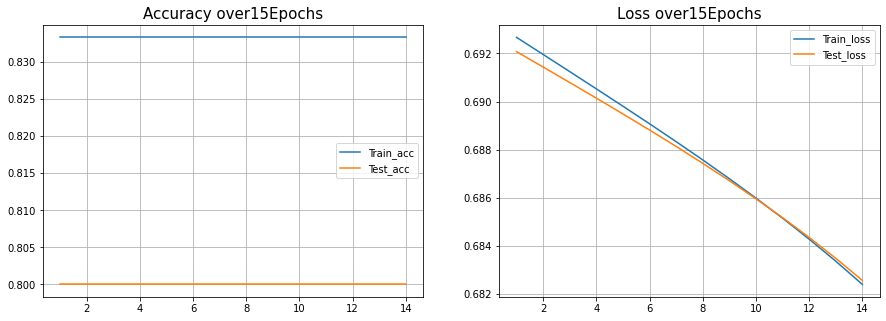

In [9]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 15)

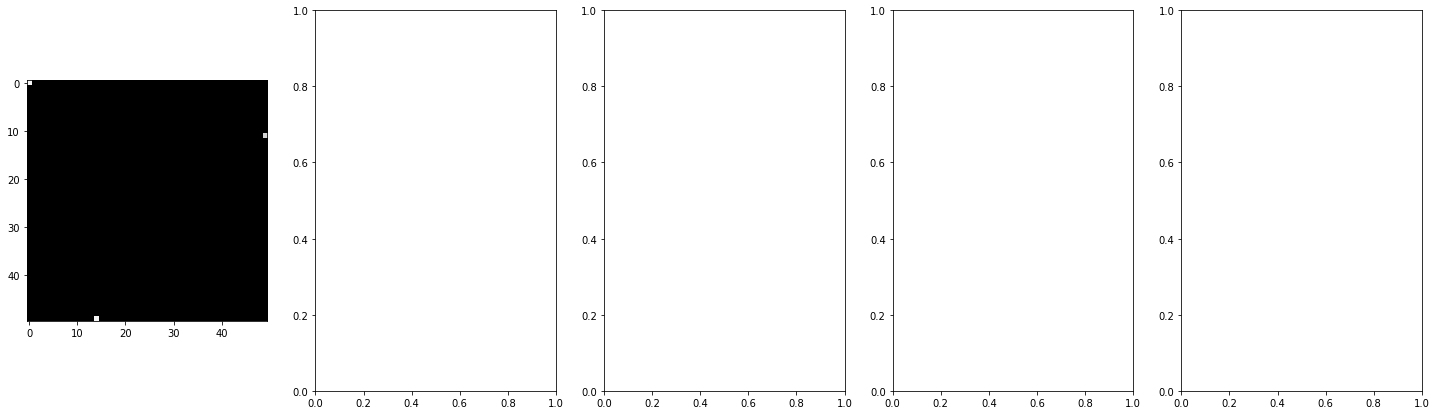

[[0.49106503]
 [0.49106503]
 [0.49108765]
 [0.49106503]
 [0.49106503]] 0
'Tblood'    40.100
'HR'        20.000
'SpO2'      50.000
'Class'          1
Name: 18, dtype: object
8
4
18
1
3


In [10]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image

"""test_image = image.load_img('dataset2/two/single_prediction/covid.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)"""
fig, ax = plt.subplots(1, len(y_test), figsize=(25, 7))
ax[0].imshow(X_test_img[0])
plt.show()
result = classifier.predict(X_test_img)
print(result,y_test.loc[8])
print(expr.loc[18])
j = 0 
for i in y_test.index:
    print(i)
    #result = classifier.predict(X_test_img.loc[i])
    ax[j].imshow(X_test_img[j])
    ax[j].title.set_text("Test[{}] - class '{}' {}".format(i, result[j][0],y_test.loc[i]))
    j += 1

#result = classifier.predict(test_image)
#print(training_set.class_indices)


In [62]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('dataset2/two/single_prediction/covid.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Positive Chest X-ray ')


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: 'dataset2/two/single_prediction/covid.jpeg'

In [ ]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)


In [ ]:
test_image = image.load_img('dataset2/two/single_prediction/covid2.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('dataset2/two/single_prediction/covid2.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Positive Chest X-ray ')

In [ ]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('dataset2/two/single_prediction/normal.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

img=mpimg.imread('dataset2/two/single_prediction/normal.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('Covid-19 Negative Chest X-ray ')

In [ ]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

In [ ]:
!pip install opencv-python

In [ ]:
test_set.reset() 
pred = classifier.predict_generator(test_set,18,verbose=1)
print('Predictions finished')

